In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import linear_model

%matplotlib inline

pd.set_option("display.max_columns", 1000)




In [2]:
%%time
df_numeric = pd.read_csv("train_numeric.csv", encoding='utf-8', nrows=100000)
df_numeric.head(10)


Wall time: 6.06 s


In [7]:
%%time
df_date = pd.read_csv("train_date.csv", encoding='utf-8', nrows=100000)
df_date.head(10)

Wall time: 8.13 s


In [3]:
%%time
df_categorical = pd.read_csv("train_categorical.csv", encoding='utf-8', nrows=100000)
df_categorical.head(10)

<string>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,337,340,342,344,346,348,351,354,357,360,363,366,369,372,375,378,381,384,387,390,393,396,399,402,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,4

Wall time: 22.8 s


In [34]:
df_numeric_ng = df_numeric[df_numeric['Response'] ==True]
df_numeric_ok = df_numeric[df_numeric['Response'] ==False]
df_numeric_ng.head()
df_numeric_ok.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,L0_S7_F136,L0_S7_F138,L0_S7_F142,L0_S8_F144,L0_S8_F146,L0_S8_F149,L0_S9_F155,L0_S9_F160,L0_S9_F165,L0_S9_F170,L0_S9_F175,L0_S9_F180,L0_S9_F185,L0_S9_F190,L0_S9_F195,L0_S9_F200,L0_S9_F205,L0_S9_F210,L0_S10_F219,L0_S10_F224,L0_S10_F229,L0_S10_F234,L0_S10_F239,L0_S10_F244,L0_S10_F249,L0_S10_F254,L0_S10_F259,L0_S10_F264,L0_S10_F269,L0_S10_F274,L0_S11_F282,L0_S11_F286,L0_S11_F290,L0_S11_F294,L0_S11_F298,L0_S11_F302,L0_S11_F306,L0_S11_F310,L0_S11_F314,L0_S11_F318,L0_S11_F322,L0_S11_F326,L0_S12_F330,L0_S12_F332,L0_S12_F334,L0_S12_F336,L0_S12_F338,L0_S12_F340,L0_S12_F342,L0_S12_F344,L0_S12_F346,L0_S12_F348,L0_S12_F350,L0_S12_F352,L0_S13_F354,L0_S13_F356,L0_S14_F358,L0_S14_F362,L0_S14_F366,L0_S14_F370,L0_S14_F374,L0_S14_F378,L0_S14_F382,L0_S14_F386,L0_S14_F390,L0_S15_F394,L0_S15_F397,L0_S15_F400,L0_S15_F403,L0_S15_F406,L0_S15_F409,L0_S15_F412,L0_S15_F415,L0_S15_F418,L0_S16_F421,L0_S16_F426,L0_S17_F431,L0_S17_F433,L0_S18_F435,L0_S18_F439,L0_S18_F449,L0_S19_F453,L0_S19_F455,L0_S19_F459,L0_S20_F461,L0_S20_F463,L0_S20_F466,L0_S21_F472,L0_S21_F477,L0_S21_F482,L0_S21_F487,L0_S21_F492,L0_S21_F497,L0_S21_F502,L0_S21_F507,L0_S21_F512,L0_S21_F517,L0_S21_F522,L0_S21_F527,L0_S21_F532,L0_S21_F537,L0_S22_F546,L0_S22_F551,L0_S22_F556,L0_S22_F561,L0_S22_F566,L0_S22_F571,L0_S22_F576,L0_S22_F581,L0_S22_F586,L0_S22_F591,L0_S22_F596,L0_S22_F601,L0_S22_F606,L0_S22_F611,L0_S23_F619,L0_S23_F623,L0_S23_F627,L0_S23_F631,L0_S23_F635,L0_S23_F639,L0_S23_F643,L0_S23_F647,L0_S23_F651,L0_S23_F655,L0_S23_F659,L0_S23_F663,L0_S23_F667,L0_S23_F671,L1_S24_F679,L1_S24_F683,L1_S24_F687,L1_S24_F691,L1_S24_F700,L1_S24_F719,L1_S24_F728,L1_S24_F733,L1_S24_F746,L1_S24_F751,L1_S24_F756,L1_S24_F761,L1_S24_F766,L1_S24_F775,L1_S24_F780,L1_S24_F785,L1_S24_F790,L1_S24_F795,L1_S24_F800,L1_S24_F802,L1_S24_F806,L1_S24_F808,L1_S24_F810,L1_S24_F812,L1_S24_F814,L1_S24_F816,L1_S24_F829,L1_S24_F834,L1_S24_F839,L1_S24_F844,L1_S24_F857,L1_S24_F862,L1_S24_F867,L1_S24_F872,L1_S24_F877,L1_S24_F882,L1_S24_F887,L1_S24_F892,L1_S24_F897,L1_S24_F902,L1_S24_F907,L1_S24_F920,L1_S24_F925,L1_S24_F930,L1_S24_F935,L1_S24_F948,L1_S24_F953,L1_S24_F958,L1_S24_F963,L1_S24_F968,L1_S24_F973,L1_S24_F978,L1_S24_F983,L1_S24_F988,L1_S24_F993,L1_S24_F998,L1_S24_F1000,L1_S24_F1002,L1_S24_F1004,L1_S24_F1006,L1_S24_F1008,L1_S24_F1010,L1_S24_F1012,L1_S24_F1014,L1_S24_F1016,L1_S24_F1021,L1_S24_F1026,L1_S24_F1031,L1_S24_F1036,L1_S24_F1041,L1_S24_F1046,L1_S24_F1051,L1_S24_F1056,L1_S24_F1068,L1_S24_F1072,L1_S24_F1079,L1_S24_F1083,L1_S24_F1087,L1_S24_F1094,L1_S24_F1098,L1_S24_F1102,L1_S24_F1106,L1_S24_F1110,L1_S24_F1118,L1_S24_F1122,L1_S24_F1126,L1_S24_F1130,L1_S24_F1134,L1_S24_F1145,L1_S24_F1148,L1_S24_F1161,L1_S24_F1166,L1_S24_F1170,L1_S24_F1172,L1_S24_F1174,L1_S24_F1176,L1_S24_F1180,L1_S24_F1184,L1_S24_F1197,L1_S24_F1202,L1_S24_F1207,L1_S24_F1212,L1_S24_F1225,L1_S24_F1230,L1_S24_F1235,L1_S24_F1240,L1_S24_F1245,L1_S24_F1250,L1_S24_F1255,L1_S24_F1260,L1_S24_F1265,L1_S24_F1270,L1_S24_F1275,L1_S24_F1288,L1_S24_F1293,L1_S24_F1298,L1_S24_F1303,L1_S24_F1316,L1_S24_F1321,L1_S24_F1326,L1_S24_F1331,L1_S24_F1336,L1_S24_F1341,L1_S24_F1346,L1_S24_F1351,L1_S24_F1356,L1_S24_F1361,L1_S24_F1366,L1_S24_F1371,L1_S24_F1376,L1_S24_F1381,L1_S24_F1386,L1_S24_F1391,L1_S24_F1396,L1_S24_F1401,L1_S24_F1406,L1_S24_F1411,L1_S24_F1416,L1_S24_F1421,L1_S24_F1426,L1_S24_F1431,L1_S24_F1436,L1_S24_F1441,L1_S24_F1446,L1_S24_F1451,L1_S24_F1463,L1_S24_F1467,L1_S24_F1474,L1_S24_F1478,L1_S24_F1482,L1_S24_F1486,L1_S24_F1490,L1_S24_F1494,L1_S24_F1498,L1_S24_F1502,L1_S24_F1506,L1_S24_F1512,L1_S24_F1514,L1_S24_F1516,L1_S24_F1518,L1_S24_F1520,L1_S24_F1539,L1_S24_F1544,L1_S24_F15

In [35]:
len(df_numeric_ok)

99432

In [8]:
df_date_ng = df_date.iloc[df_numeric_ng.index.values]
df_date_ng.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,L0_S6_D130,L0_S6_D134,L0_S7_D137,L0_S7_D139,L0_S7_D140,L0_S7_D141,L0_S7_D143,L0_S8_D145,L0_S8_D147,L0_S8_D148,L0_S8_D150,L0_S9_D152,L0_S9_D157,L0_S9_D162,L0_S9_D167,L0_S9_D172,L0_S9_D177,L0_S9_D182,L0_S9_D187,L0_S9_D192,L0_S9_D197,L0_S9_D202,L0_S9_D207,L0_S9_D212,L0_S10_D216,L0_S10_D221,L0_S10_D226,L0_S10_D231,L0_S10_D236,L0_S10_D241,L0_S10_D246,L0_S10_D251,L0_S10_D256,L0_S10_D261,L0_S10_D266,L0_S10_D271,L0_S10_D276,L0_S11_D280,L0_S11_D284,L0_S11_D288,L0_S11_D292,L0_S11_D296,L0_S11_D300,L0_S11_D304,L0_S11_D308,L0_S11_D312,L0_S11_D316,L0_S11_D320,L0_S11_D324,L0_S11_D328,L0_S12_D331,L0_S12_D333,L0_S12_D335,L0_S12_D337,L0_S12_D339,L0_S12_D341,L0_S12_D343,L0_S12_D345,L0_S12_D347,L0_S12_D349,L0_S12_D351,L0_S12_D353,L0_S13_D355,L0_S13_D357,L0_S14_D360,L0_S14_D364,L0_S14_D368,L0_S14_D372,L0_S14_D376,L0_S14_D380,L0_S14_D384,L0_S14_D388,L0_S14_D392,L0_S15_D395,L0_S15_D398,L0_S15_D401,L0_S15_D404,L0_S15_D407,L0_S15_D410,L0_S15_D413,L0_S15_D416,L0_S15_D419,L0_S16_D423,L0_S16_D428,L0_S17_D432,L0_S17_D434,L0_S18_D437,L0_S18_D441,L0_S18_D444,L0_S18_D447,L0_S18_D451,L0_S19_D454,L0_S19_D456,L0_S19_D457,L0_S19_D458,L0_S19_D460,L0_S20_D462,L0_S20_D464,L0_S20_D465,L0_S20_D467,L0_S21_D469,L0_S21_D474,L0_S21_D479,L0_S21_D484,L0_S21_D489,L0_S21_D494,L0_S21_D499,L0_S21_D504,L0_S21_D509,L0_S21_D514,L0_S21_D519,L0_S21_D524,L0_S21_D529,L0_S21_D534,L0_S21_D539,L0_S22_D543,L0_S22_D548,L0_S22_D553,L0_S22_D558,L0_S22_D563,L0_S22_D568,L0_S22_D573,L0_S22_D578,L0_S22_D583,L0_S22_D588,L0_S22_D593,L0_S22_D598,L0_S22_D603,L0_S22_D608,L0_S22_D613,L0_S23_D617,L0_S23_D621,L0_S23_D625,L0_S23_D629,L0_S23_D633,L0_S23_D637,L0_S23_D641,L0_S23_D645,L0_S23_D649,L0_S23_D653,L0_S23_D657,L0_S23_D661,L0_S23_D665,L0_S23_D669,L0_S23_D673,L1_S24_D677,L1_S24_D681,L1_S24_D685,L1_S24_D689,L1_S24_D693,L1_S24_D697,L1_S24_D702,L1_S24_D707,L1_S24_D712,L1_S24_D716,L1_S24_D721,L1_S24_D725,L1_S24_D730,L1_S24_D735,L1_S24_D739,L1_S24_D743,L1_S24_D748,L1_S24_D753,L1_S24_D758,L1_S24_D763,L1_S24_D768,L1_S24_D772,L1_S24_D777,L1_S24_D782,L1_S24_D787,L1_S24_D792,L1_S24_D797,L1_S24_D801,L1_S24_D804,L1_S24_D807,L1_S24_D809,L1_S24_D811,L1_S24_D813,L1_S24_D815,L1_S24_D818,L1_S24_D822,L1_S24_D826,L1_S24_D831,L1_S24_D836,L1_S24_D841,L1_S24_D846,L1_S24_D850,L1_S24_D854,L1_S24_D859,L1_S24_D864,L1_S24_D869,L1_S24_D874,L1_S24_D879,L1_S24_D884,L1_S24_D889,L1_S24_D894,L1_S24_D899,L1_S24_D904,L1_S24_D909,L1_S24_D913,L1_S24_D917,L1_S24_D922,L1_S24_D927,L1_S24_D932,L1_S24_D937,L1_S24_D941,L1_S24_D945,L1_S24_D950,L1_S24_D955,L1_S24_D960,L1_S24_D965,L1_S24_D970,L1_S24_D975,L1_S24_D980,L1_S24_D985,L1_S24_D990,L1_S24_D995,L1_S24_D999,L1_S24_D1001,L1_S24_D1003,L1_S24_D1005,L1_S24_D1007,L1_S24_D1009,L1_S24_D1011,L1_S24_D1013,L1_S24_D1015,L1_S24_D1018,L1_S24_D1023,L1_S24_D1028,L1_S24_D1033,L1_S24_D1038,L1_S24_D1043,L1_S24_D1048,L1_S24_D1053,L1_S24_D1058,L1_S24_D1062,L1_S24_D1066,L1_S24_D1070,L1_S24_D1074,L1_S24_D1077,L1_S24_D1081,L1_S24_D1085,L1_S24_D1089,L1_S24_D1092,L1_S24_D1096,L1_S24_D1100,L1_S24_D1104,L1_S24_D1108,L1_S24_D1112,L1_S24_D1116,L1_S24_D1120,L1_S24_D1124,L1_S24_D1128,L1_S24_D1132,L1_S24_D1135,L1_S24_D1138,L1_S24_D1141,L1_S24_D1143,L1_S24_D1146,L1_S24_D1149,L1_S24_D1151,L1_S24_D1153,L1_S24_D1155,L1_S24_D1158,L1_S24_D1163,L1_S24_D1168,L1_S24_D1171,L1_S24_D1173,L1_S24_D1175,L1_S24_D1178,L1_S24_D1182,L1_S24_D1186,L1_S24_D1190,L1_S24_D1194,L1_S24_D1199,L1_S24_D1204,L1_S24_D1209,L1_S24_D1214,L1_S24_D1218,L1_S24_D1222,L1_S24_D1227,L1_S24_D1232,L1_S24_D1237,L1_S24_D1242,L1_S24_D1247,L1_S24_D1252,L1_S24_D1257,L1_S24_D1262,L1_S24_D1267,L1_S24_D1272,L1_S24_D1277,L1_S24_D1281,L1_S24_D1285,L1_S24_D1290,L1_S24_D1295,L1_S24_D13

In [ ]:
df_categorical.head()

In [36]:
df_categorical_ng = df_categorical.iloc[df_numeric_ng.index.values]
df_categorical_ok = df_categorical.iloc[df_numeric_ok.index.values]
df_categorical_ok.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,L0_S2_F43,L0_S2_F45,L0_S2_F47,L0_S2_F49,L0_S2_F51,L0_S2_F53,L0_S2_F55,L0_S2_F57,L0_S2_F59,L0_S2_F61,L0_S2_F63,L0_S2_F65,L0_S2_F67,L0_S3_F69,L0_S3_F71,L0_S3_F73,L0_S3_F75,L0_S3_F77,L0_S3_F79,L0_S3_F81,L0_S3_F83,L0_S3_F85,L0_S3_F87,L0_S3_F89,L0_S3_F91,L0_S3_F93,L0_S3_F95,L0_S3_F97,L0_S3_F99,L0_S3_F101,L0_S3_F103,L0_S4_F105,L0_S4_F107,L0_S4_F108,L0_S4_F110,L0_S4_F112,L0_S4_F113,L0_S6_F119,L0_S6_F121,L0_S6_F123,L0_S6_F125,L0_S6_F126,L0_S6_F128,L0_S6_F129,L0_S6_F131,L0_S6_F133,L0_S6_F135,L0_S9_F151,L0_S9_F153,L0_S9_F154,L0_S9_F156,L0_S9_F158,L0_S9_F159,L0_S9_F161,L0_S9_F163,L0_S9_F164,L0_S9_F166,L0_S9_F168,L0_S9_F169,L0_S9_F171,L0_S9_F173,L0_S9_F174,L0_S9_F176,L0_S9_F178,L0_S9_F179,L0_S9_F181,L0_S9_F183,L0_S9_F184,L0_S9_F186,L0_S9_F188,L0_S9_F189,L0_S9_F191,L0_S9_F193,L0_S9_F194,L0_S9_F196,L0_S9_F198,L0_S9_F199,L0_S9_F201,L0_S9_F203,L0_S9_F204,L0_S9_F206,L0_S9_F208,L0_S9_F209,L0_S9_F211,L0_S9_F213,L0_S9_F214,L0_S10_F215,L0_S10_F217,L0_S10_F218,L0_S10_F220,L0_S10_F222,L0_S10_F223,L0_S10_F225,L0_S10_F227,L0_S10_F228,L0_S10_F230,L0_S10_F232,L0_S10_F233,L0_S10_F235,L0_S10_F237,L0_S10_F238,L0_S10_F240,L0_S10_F242,L0_S10_F243,L0_S10_F245,L0_S10_F247,L0_S10_F248,L0_S10_F250,L0_S10_F252,L0_S10_F253,L0_S10_F255,L0_S10_F257,L0_S10_F258,L0_S10_F260,L0_S10_F262,L0_S10_F263,L0_S10_F265,L0_S10_F267,L0_S10_F268,L0_S10_F270,L0_S10_F272,L0_S10_F273,L0_S10_F275,L0_S10_F277,L0_S10_F278,L0_S11_F279,L0_S11_F281,L0_S11_F283,L0_S11_F285,L0_S11_F287,L0_S11_F289,L0_S11_F291,L0_S11_F293,L0_S11_F295,L0_S11_F297,L0_S11_F299,L0_S11_F301,L0_S11_F303,L0_S11_F305,L0_S11_F307,L0_S11_F309,L0_S11_F311,L0_S11_F313,L0_S11_F315,L0_S11_F317,L0_S11_F319,L0_S11_F321,L0_S11_F323,L0_S11_F325,L0_S11_F327,L0_S11_F329,L0_S14_F359,L0_S14_F361,L0_S14_F363,L0_S14_F365,L0_S14_F367,L0_S14_F369,L0_S14_F371,L0_S14_F373,L0_S14_F375,L0_S14_F377,L0_S14_F379,L0_S14_F381,L0_S14_F383,L0_S14_F385,L0_S14_F387,L0_S14_F389,L0_S14_F391,L0_S14_F393,L0_S15_F396,L0_S15_F399,L0_S15_F402,L0_S15_F405,L0_S15_F408,L0_S15_F411,L0_S15_F414,L0_S15_F417,L0_S15_F420,L0_S16_F422,L0_S16_F424,L0_S16_F425,L0_S16_F427,L0_S16_F429,L0_S16_F430,L0_S18_F436,L0_S18_F438,L0_S18_F440,L0_S18_F442,L0_S18_F443,L0_S18_F445,L0_S18_F446,L0_S18_F448,L0_S18_F450,L0_S18_F452,L0_S21_F468,L0_S21_F470,L0_S21_F471,L0_S21_F473,L0_S21_F475,L0_S21_F476,L0_S21_F478,L0_S21_F480,L0_S21_F481,L0_S21_F483,L0_S21_F485,L0_S21_F486,L0_S21_F488,L0_S21_F490,L0_S21_F491,L0_S21_F493,L0_S21_F495,L0_S21_F496,L0_S21_F498,L0_S21_F500,L0_S21_F501,L0_S21_F503,L0_S21_F505,L0_S21_F506,L0_S21_F508,L0_S21_F510,L0_S21_F511,L0_S21_F513,L0_S21_F515,L0_S21_F516,L0_S21_F518,L0_S21_F520,L0_S21_F521,L0_S21_F523,L0_S21_F525,L0_S21_F526,L0_S21_F528,L0_S21_F530,L0_S21_F531,L0_S21_F533,L0_S21_F535,L0_S21_F536,L0_S21_F538,L0_S21_F540,L0_S21_F541,L0_S22_F542,L0_S22_F544,L0_S22_F545,L0_S22_F547,L0_S22_F549,L0_S22_F550,L0_S22_F552,L0_S22_F554,L0_S22_F555,L0_S22_F557,L0_S22_F559,L0_S22_F560,L0_S22_F562,L0_S22_F564,L0_S22_F565,L0_S22_F567,L0_S22_F569,L0_S22_F570,L0_S22_F572,L0_S22_F574,L0_S22_F575,L0_S22_F577,L0_S22_F579,L0_S22_F580,L0_S22_F582,L0_S22_F584,L0_S22_F585,L0_S22_F587,L0_S22_F589,L0_S22_F590,L0_S22_F592,L0_S22_F594,L0_S22_F595,L0_S22_F597,L0_S22_F599,L0_S22_F600,L0_S22_F602,L0_S22_F604,L0_S22_F605,L0_S22_F607,L0_S22_F609,L0_S22_F610,L0_S22_F612,L0_S22_F614,L0_S22_F615,L0_S23_F616,L0_S23_F618,L0_S23_F620,L0_S23_F622,L0_S23_F624,L0_S23_F626,L0_S23_F628,L0_S23_F630,L0_S23_F632,L0_S23_F634,L0_S23_F636,L0_S23_F638,L0_S23_F640,L0_S23_F642,L0_S23_F644,L0_S23_F646,L0_S23_F648,L0_S23_F650,L0_S23_F652,L0_S23_F654,L0_S23_F656,L0_S23_F658,L0_S23_F660,L0_S23_F662,L0_S23_F664,L0_S23_F666,L0_S23_F668,L0_S23_F670,L0_S23_F672,L0_S23_F674,L1_S24_F675,L1_S24_F676,L1_S24_F678,L1_S24_F680,L1_S24_F682,L1_S24_F684,L1_S24_F686,L1_S24_F688,L1_S24_F690,L1_S24_F692,L1_S24_F694,L1_S24_F695,L1_S24_F696,L1_S24_F698,L1_S24_F699,L1_S24_F701,L1_S24_F703,L1_S24_F704,L1_S24_F705,L1_S24_F706,L1_S24_F708,L

### categorical って何？

In [ ]:
# 欠損データ・有効データ数
#print (df_categorical_ng.count())
#print (len(df_categorical_ng) - df_categorical_ng.count())


In [37]:
df_categorical_ng_tmp = df_categorical_ng.drop(columns='Id').dropna(how='all').dropna(axis=1, how='all').fillna(0)
df_categorical_ng_tmp.to_csv('output/df_categorical_ng_tmp.csv')


In [38]:
df_categorical_ok_tmp = df_categorical_ok.drop(columns='Id').dropna(how='all').dropna(axis=1, how='all').fillna(0)
df_categorical_ok_tmp.to_csv('output/df_categorical_ok_tmp.csv')


### Tのトリム・・

In [43]:
df_categorical_ng_trimT = pd.read_csv('output/df_categorical_ng_tmp.csv')
df_categorical_ok_trimT = pd.read_csv('output/df_categorical_ok_tmp.csv')

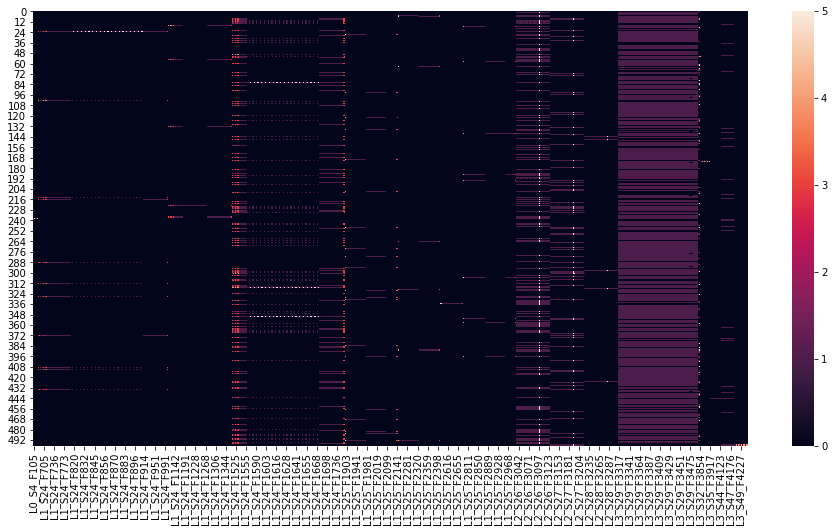

In [44]:
import seaborn as sns
plt.figure(figsize=(16, 8)) 
sns.heatmap(df_categorical_ng_trimT.drop(columns='Id'), vmin = 0, vmax = 5)

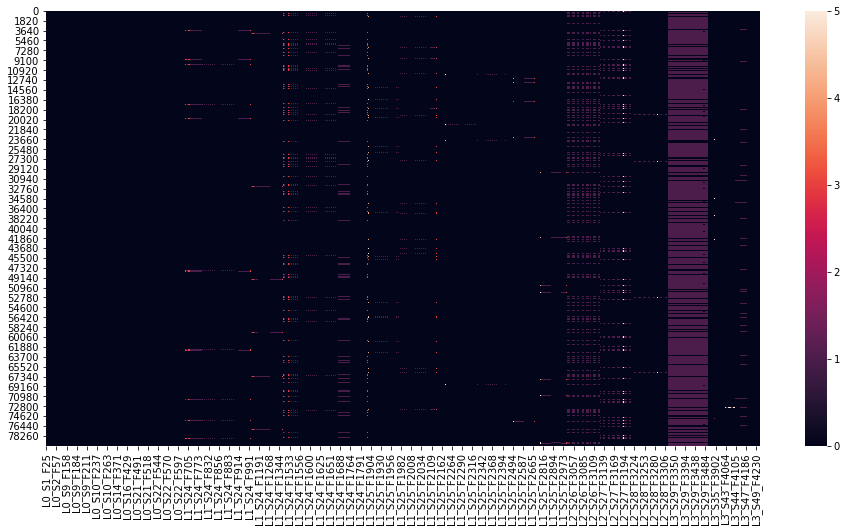

In [45]:
plt.figure(figsize=(16, 8)) 
sns.heatmap(df_categorical_ok_trimT.drop(columns='Id'), vmin = 0, vmax = 5)

### ステーションごとにTのカテゴリと同じステーションのものがいそう。
→ 列の削除の使用できないか？

In [ ]:
# staion noNanから何かできないか？